In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Directory containing the output files
output_dir = './'

# List to store DataFrame objects for each simulation
dfs = []

# Iterate over each output file
for file in os.listdir(output_dir):
    if file.endswith('.txt'):
        # Extract width from filename
        width = file.split('.')[0].split('_')[-1]  # Assuming filename format is 'output_width_{width}.txt'
        
        # Read the data into a DataFrame
        file_path = os.path.join(output_dir, file)
        df = pd.read_csv(file_path, sep='\s+', skiprows=1, header=None,
                         names=['v-sweep','abs(V(alim))','V(drain)', 'V(gate)', 'V(source)', 'V(body)',
                                'I(Vd)', 'I(Vg)', 'I(Vs)', 'I(Vb)'])
        # Add 'W' column to DataFrame
        df['W'] = width
        dfs.append(df)

# Concatenate all DataFrames
all_data = pd.concat(dfs)

In [3]:
all_data

,v-sweep,abs(V(alim)),V(drain),V(gate),V(source),V(body),I(Vd),I(Vg),I(Vs),I(Vb),W
0,25.0,0.00,0.0,0.00,0.0,0.0,-5.769939e-21,8.812017e-20,-5.769939e-21,-7.658029e-20,360n
1,25.0,0.05,0.0,0.05,0.0,0.0,2.221788e-11,-4.443624e-11,2.221788e-11,4.839543e-16,360n
2,25.0,0.10,0.0,0.10,0.0,0.0,2.236404e-11,-4.472914e-11,2.236404e-11,1.057839e-15,360n
3,25.0,0.15,0.0,0.15,0.0,0.0,7.341115e-12,-1.468396e-11,7.341115e-12,1.739659e-15,360n
4,25.0,0.20,0.0,0.20,0.0,0.0,2.860495e-11,-5.721250e-11,2.860495e-11,2.581698e-15,360n
...,...,...,...,...,...,...,...,...,...,...,...
18,25.0,0.90,0.0,0.90,0.0,0.0,1.637155e-08,-3.280739e-08,1.637155e-08,6.428308e-11,180n
19,25.0,0.95,0.0,0.95,0.0,0.0,2.062353e-08,-4.140092e-08,2.062353e-08,1.538706e-10,180n
20,25.0,1.00,0.0,1.00,0.0,0.0,2.575283e-08,-5.187136e-08,2.575283e-08,3.657056e-10,180n
21,25.0,1.05,0.0,1.05,0.0,0.0,3.191231e-08,-6.468488e-08,3.191231e-08,8.602660e-10,180n


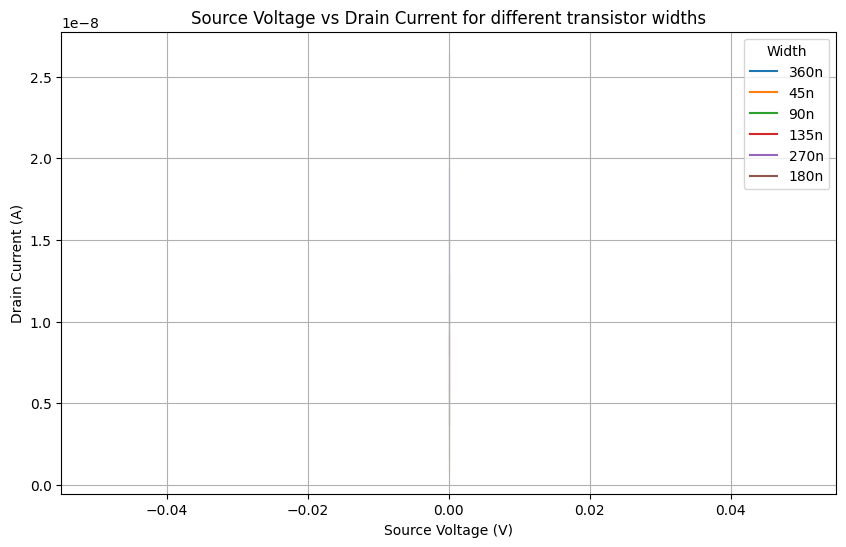

In [4]:
# Plotting V(source) vs I(Vd) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='V(source)', y='I(Vd)', hue='W')
plt.xlabel('Source Voltage (V)')
plt.ylabel('Drain Current (A)')
plt.title('Source Voltage vs Drain Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()

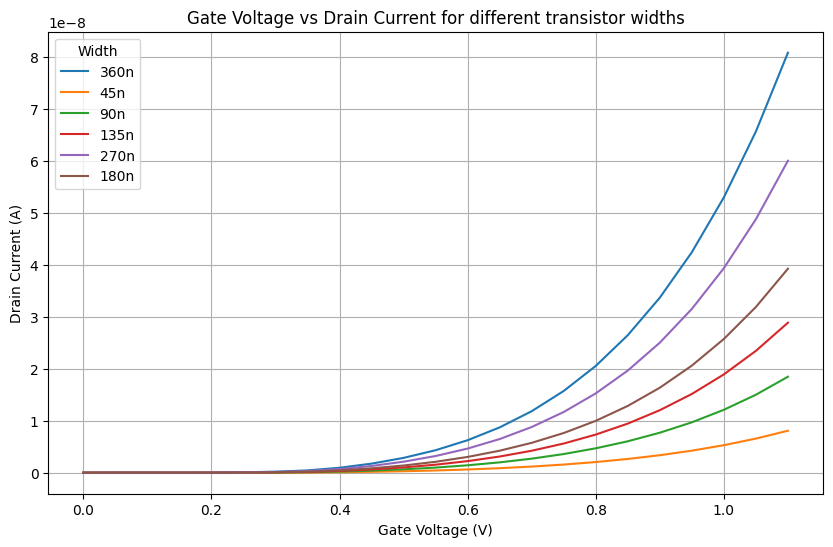

In [7]:
# Plotting V(gate) vs I(Vd) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='V(gate)', y='I(Vd)', hue='W')
plt.xlabel('Gate Voltage (V)')
plt.ylabel('Drain Current (A)')
plt.title('Gate Voltage vs Drain Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()

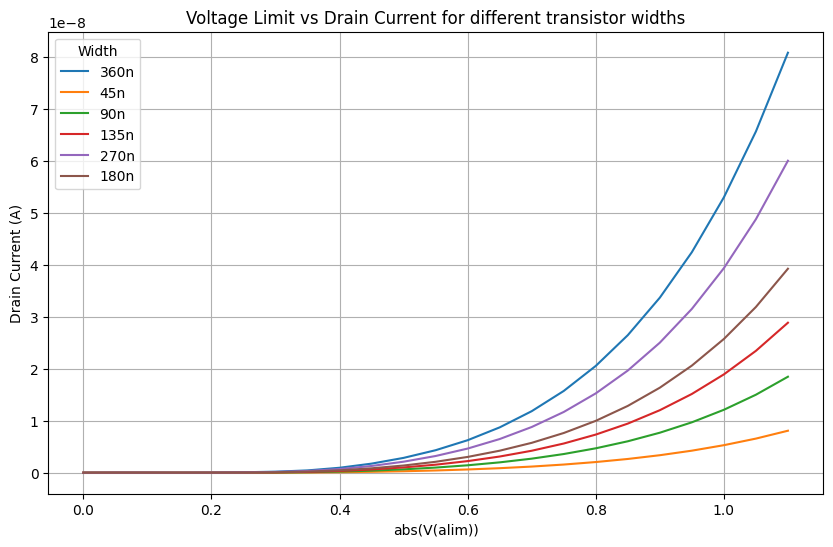

In [5]:
# Plotting abs(V(alim)) vs I(Vd) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='abs(V(alim))', y='I(Vd)', hue='W')
plt.xlabel('abs(V(alim))')
plt.ylabel('Drain Current (A)')
plt.title('Voltage Limit vs Drain Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()

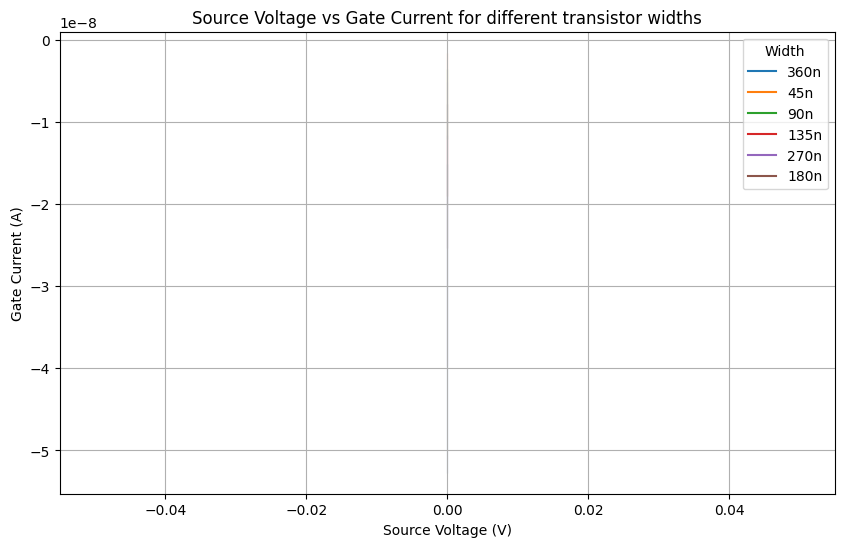

In [6]:
# Plotting V(source) vs I(Vg) for each width
plt.figure(figsize=(10, 6))
sns.lineplot(data=all_data, x='V(source)', y='I(Vg)', hue='W')
plt.xlabel('Source Voltage (V)')
plt.ylabel('Gate Current (A)')
plt.title('Source Voltage vs Gate Current for different transistor widths')
plt.legend(title='Width')
plt.grid(True)
plt.show()